In [1]:
# Unofficial implementation of RAdam in Keras and TensorFlow.
# https://github.com/CyberZHG/keras-radam
# pip install keras-rectified-adam

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from keras_radam import RAdam
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
# data load (MNIST)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# data shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
# data preprocessing
x_train = x_train.reshape(-1, 28*28)/255.
x_test = x_test.reshape(-1, 28*28)/255.

# one-hot-encoding
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)

In [17]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RAdam(), metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_12 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                170       
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [19]:
# train model
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 108s 2ms/step - loss: 1.2388 - acc: 0.5884 - val_loss: 0.4147 - val_acc: 0.8907
Epoch 2/50
48000/48000 [==============================] - 2s 33us/step - loss: 0.3348 - acc: 0.9077 - val_loss: 0.2503 - val_acc: 0.9282
Epoch 3/50
48000/48000 [==============================] - 2s 36us/step - loss: 0.2362 - acc: 0.9328 - val_loss: 0.2126 - val_acc: 0.9387
Epoch 4/50
48000/48000 [==============================] - 2s 39us/step - loss: 0.1916 - acc: 0.9451 - val_loss: 0.1771 - val_acc: 0.9503
Epoch 5/50
48000/48000 [==============================] - 2s 36us/step - loss: 0.1618 - acc: 0.9530 - val_loss: 0.1573 - val_acc: 0.9542
Epoch 6/50
48000/48000 [==============================] - 2s 35us/step - loss: 0.1389 - acc: 0.9601 - val_loss: 0.1465 - val_acc: 0.9591
Epoch 7/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.1221 - acc: 0.9639 - val_loss: 0.1422 - val_ac

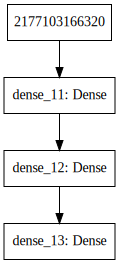

In [26]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

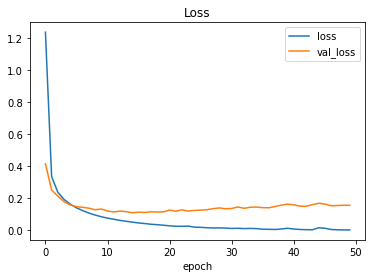

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

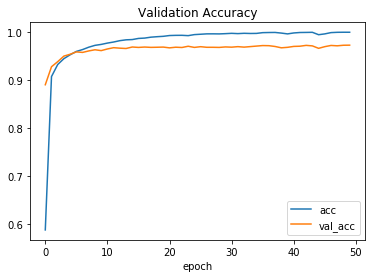

In [28]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Validation Accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'])

In [29]:
pred_y = model.predict_classes(x_test)

In [30]:
(y_test.argmax(axis=1) == pred_y).mean() # accuracy for test data

0.9746

In [31]:
idx = np.where((y_test.argmax(axis=1) != pred_y))[0]

Text(0.5, 1.0, '3 / 8')

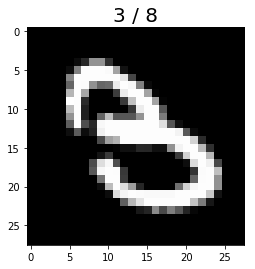

In [32]:
plt.imshow(x_test[idx[0]].reshape(28,28), cmap='gray')
plt.title(str(y_test[idx[0]].argmax())+' / '+str(pred_y[idx[0]]), fontsize=20)